In [1]:
# unit test
import unittest

# model and transform
import torchvision
from torchvision import transforms
from torchvision.models import shufflenet_v2_x1_0, ShuffleNet_V2_X1_0_Weights
from torchvision.models.feature_extraction import get_graph_node_names

# "helper" needs to be part of sys path
import sys
sys.path.insert(0, "helper")
sys.path.insert(0, "/helper")
sys.path.insert(0, "./helper")
sys.path.insert(0, "../helper")
print(sys.path)

device="cpu"

%load_ext autoreload
%autoreload 2

# own module
from visualisation.deepdream import *

['../helper', './helper', '/helper', 'helper', 'C:\\Users\\Prinzessin\\projects\\decentnet\\datasceyence\\examples', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\python39.zip', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\DLLs', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta', '', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Prinzessin\\.ipython']


**************************************************
example graph nodes: ['decent_block.decent_block_116.2.0.branch2.0', 'decent_block.decent_block_116.2.0.branch2.1', 'decent_block.decent_block_116.2.0.branch2.2', 'decent_block.decent_block_116.2.0.branch2.3', 'decent_block.decent_block_116.2.0.branch2.4', 'decent_block.decent_block_116.2.0.branch2.5', 'decent_block.decent_block_116.2.0.branch2.6', 'decent_block.decent_block_116.2.0.branch2.7', 'decent_block.decent_block_116.2.0.cat', 'decent_block.decent_block_116.2.0.size']
**************************************************
Layer: Conv2d(58, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)


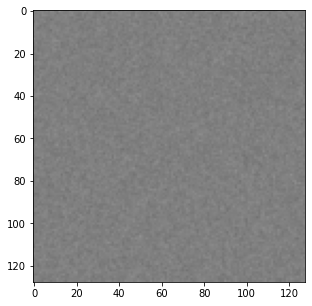

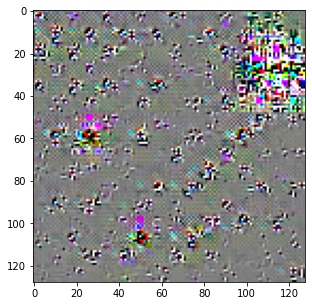

In [7]:
# get one example image
ichallenge_data = torchvision.datasets.ImageFolder('example_data')
img, label = ichallenge_data.__getitem__(1)

img=Image.effect_noise((500, 500), 25).convert('RGB') 

# tensor preparation
resize = transforms.Resize(128)
to_tensor = transforms.ToTensor()
img = resize(img)
fig = plt.figure(figsize = (5 , 5))
plt.imshow(img)
img = to_tensor(img).to(device)

# model preparation
#model = shufflenet_v2_x1_0(weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1).to(device)

from model.decent_block import *
model = DecentBlock("example_ckpt", "exp_1_mlp_c0_ep46_1.5189.ckpt", 2, device)

# layer to focus on
print("*"*50)
print("example graph nodes:", get_graph_node_names(model)[0][10:20])
print("*"*50)
layer = model.decent_block.decent_block_116[2][3].branch2[0]
# model.decent_block.decent_block_reduction[0] # model.stage4[0].branch1[2] # model.fusion_layer # conv

# run deep dream
dd = DeepDream(model=model, layer=layer, device=device, iterations=1000, lr=0.1)
dd.run(img)
dd.plot(5)

**************************************************
example graph nodes: ['decent_block.decent_block_116.2.0.branch2.0', 'decent_block.decent_block_116.2.0.branch2.1', 'decent_block.decent_block_116.2.0.branch2.2', 'decent_block.decent_block_116.2.0.branch2.3', 'decent_block.decent_block_116.2.0.branch2.4', 'decent_block.decent_block_116.2.0.branch2.5', 'decent_block.decent_block_116.2.0.branch2.6', 'decent_block.decent_block_116.2.0.branch2.7', 'decent_block.decent_block_116.2.0.cat', 'decent_block.decent_block_116.2.0.size']
**************************************************
Layer: Conv2d(58, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)


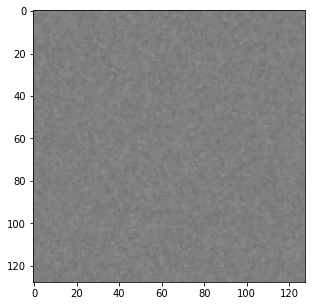

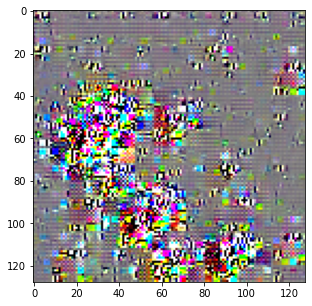

In [8]:
# get one example image
ichallenge_data = torchvision.datasets.ImageFolder('example_data')
img, label = ichallenge_data.__getitem__(1)

img=Image.effect_noise((500, 500), 25).convert('RGB') 

# tensor preparation
resize = transforms.Resize(128)
to_tensor = transforms.ToTensor()
img = resize(img)
fig = plt.figure(figsize = (5 , 5))
plt.imshow(img)
img = to_tensor(img).to(device)

# model preparation
#model = shufflenet_v2_x1_0(weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1).to(device)

from model.decent_block import *
model = DecentBlock("example_ckpt", "exp_1_mlp_c3_ep43_1.2093.ckpt", 2, device)

# layer to focus on
print("*"*50)
print("example graph nodes:", get_graph_node_names(model)[0][10:20])
print("*"*50)
layer = model.decent_block.decent_block_116[2][3].branch2[0]
# model.decent_block.decent_block_reduction[0] # model.stage4[0].branch1[2] # model.fusion_layer # conv

# run deep dream
dd = DeepDream(model=model, layer=layer, device=device, iterations=1000, lr=0.1)
dd.run(img)
dd.plot(5)

**************************************************
example graph nodes: ['decent_block.decent_block_116.2.0.branch2.0', 'decent_block.decent_block_116.2.0.branch2.1', 'decent_block.decent_block_116.2.0.branch2.2', 'decent_block.decent_block_116.2.0.branch2.3', 'decent_block.decent_block_116.2.0.branch2.4', 'decent_block.decent_block_116.2.0.branch2.5', 'decent_block.decent_block_116.2.0.branch2.6', 'decent_block.decent_block_116.2.0.branch2.7', 'decent_block.decent_block_116.2.0.cat', 'decent_block.decent_block_116.2.0.size']
**************************************************
Layer: Conv2d(58, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)


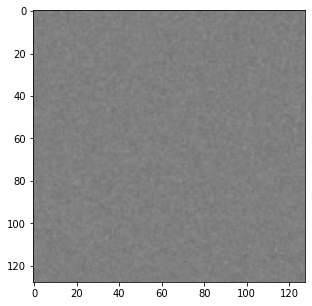

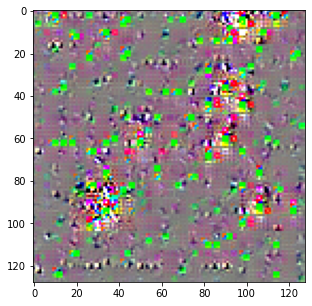

In [14]:
# get one example image
ichallenge_data = torchvision.datasets.ImageFolder('example_data')
img, label = ichallenge_data.__getitem__(1)

img=Image.effect_noise((500, 500), 25).convert('RGB') 

# tensor preparation
resize = transforms.Resize(128)
to_tensor = transforms.ToTensor()
img = resize(img)
fig = plt.figure(figsize = (5 , 5))
plt.imshow(img)
img = to_tensor(img).to(device)

# model preparation
#model = shufflenet_v2_x1_0(weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1).to(device)

from model.decent_block import *
model = DecentBlock("example_ckpt", "exp_1_mlp_c5_ep36_1.1963.ckpt", 2, device)

# layer to focus on
print("*"*50)
print("example graph nodes:", get_graph_node_names(model)[0][10:20])
print("*"*50)
layer = model.decent_block.decent_block_116[2][3].branch2[0]
# model.decent_block.decent_block_reduction[0] # model.stage4[0].branch1[2] # model.fusion_layer # conv model.stage4[0].branch1[2] # 

# run deep dream
dd = DeepDream(model=model, layer=layer, device=device, iterations=5000, lr=0.01)
dd.run(img)
dd.plot(5)